## Importing Necessary Library

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the Dataset

In [29]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [31]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [32]:
print("Shape of Dataset: ",df.shape)
print("Size of Dataset: ",df.size)

Shape of Dataset:  (200, 4)
Size of Dataset:  800


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [34]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [35]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Exploratory Data Analysis

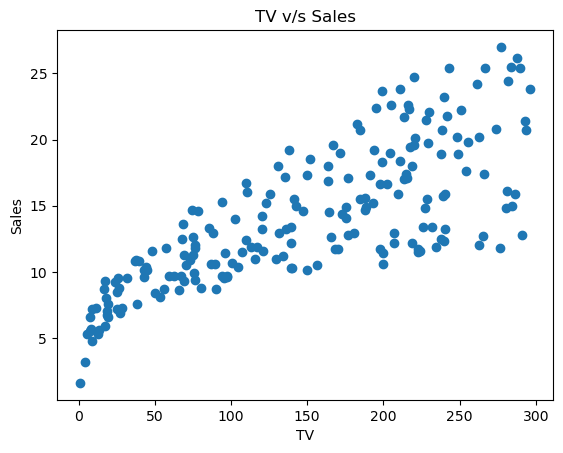

In [36]:
plt.scatter(df["TV"],df['Sales'])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title('TV v/s Sales')
plt.show()

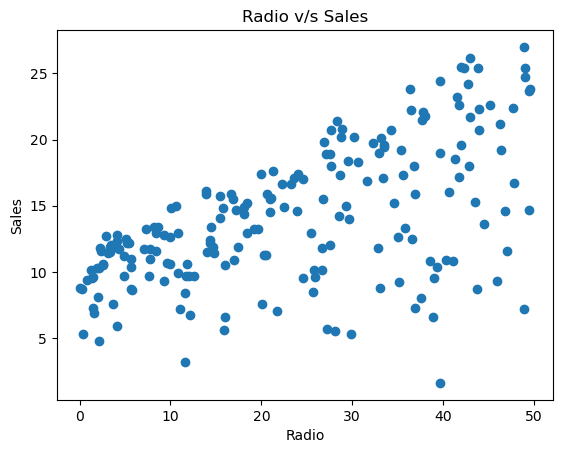

In [37]:
plt.scatter(df["Radio"],df['Sales'])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title('Radio v/s Sales')
plt.show()

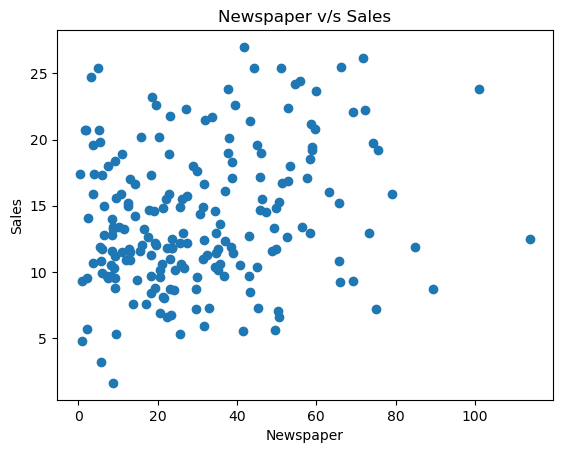

In [38]:
plt.scatter(df["Newspaper"],df['Sales'])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title('Newspaper v/s Sales')
plt.show()

In [39]:
corr = df.corr(numeric_only = True)
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Text(0.5, 1.0, 'Correlation Between Columns')

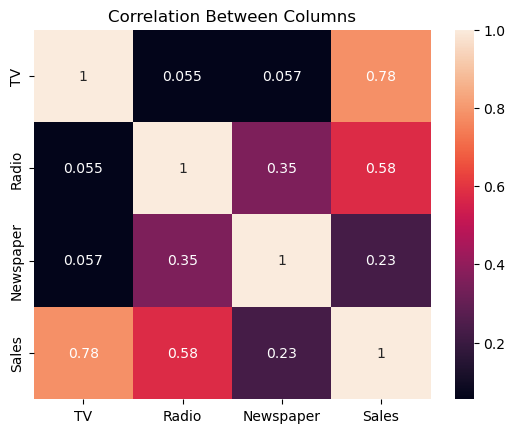

In [40]:
sns.heatmap(corr,annot=True)
plt.title("Correlation Between Columns")

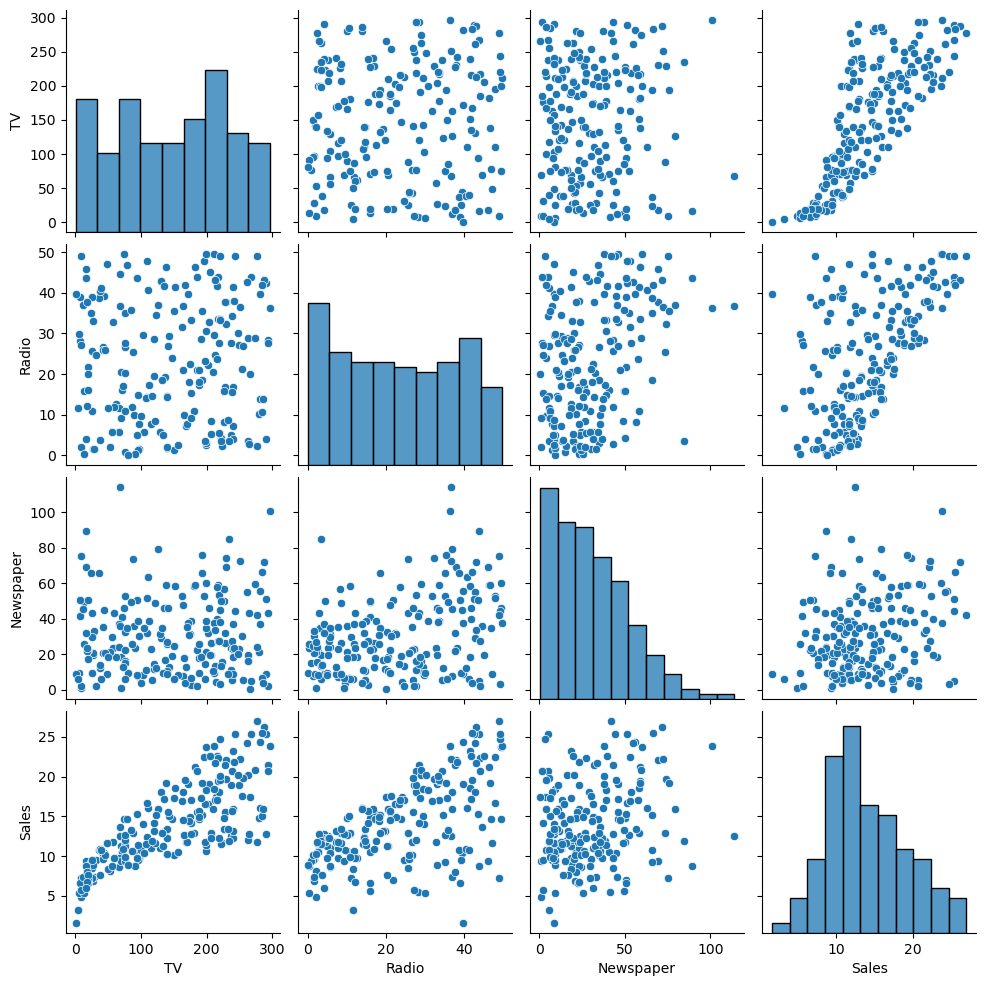

In [41]:
sns.pairplot(df)

In [42]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df[['Sales']]

### Preprocessing the Data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
x_scaled = scaler.fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42)

### Model Creation

In [46]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

### Model Fitting

In [47]:
model1.fit(X_train,Y_train)

LinearRegression()

### Model Prediction

In [48]:
model1.score(X_test,Y_test)

0.8609466508230368

In [49]:
y_pred = model1.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error , r2_score

In [51]:
mean = mean_squared_error(Y_test,y_pred)

In [52]:
r2 = r2_score(Y_test,y_pred)

In [53]:
print("Mean_Squared_Error :",mean)
print("R2_Score :",r2)

Mean_Squared_Error : 3.796797236715219
R2_Score : 0.8609466508230368


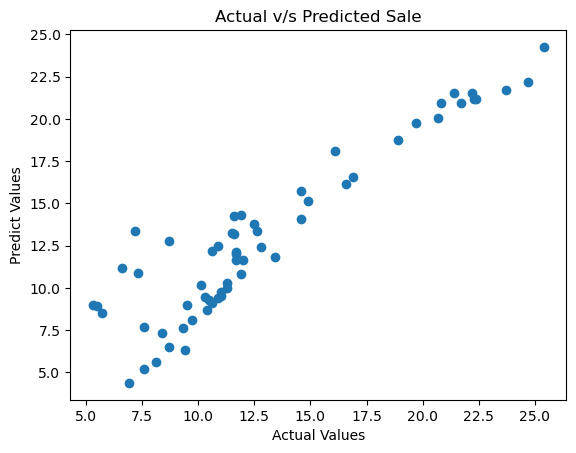

In [54]:
plt.scatter(Y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predict Values")
plt.title('Actual v/s Predicted Sale')
plt.show()